In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import os as os
os.chdir('/u/project/pellegrini/rainyliu/Daphnia')

In [4]:
def nested_cv_clock(X, y, L1R=0.1, MAX_ITER=100000):
    # X: np.array (n_samples, n_features)
    # y: np.array (n_samples, ) 
    assert(X.shape[0] == y.shape[0])

    lm = sklearn.linear_model.ElasticNetCV(l1_ratio=L1R, max_iter=MAX_ITER, cv=5)
    cv = sklearn.model_selection.LeaveOneOut()
    predictions = sklearn.model_selection.cross_val_predict(lm, X, y, cv=cv, n_jobs=-1)
    print("checkpoint 2.1")
    
    # Plot
    plt.scatter(y, predictions, s=3, c='black')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') 

    mean_ae = sklearn.metrics.mean_absolute_error(y, predictions)
    median_ae = sklearn.metrics.median_absolute_error(y, predictions)
    rsq = sklearn.metrics.r2_score(y, predictions)
    me = sklearn.metrics.max_error(y, predictions)
    pearson_r = scipy.stats.pearsonr(predictions, y)[0]

    title_plot = f'''median_ae: {round(median_ae, 2)}
    R^2: {round(rsq, 2)}
    pearson r {pearson_r}
    pearson r, squared {pearson_r ** 2}
    mean_ae: {round(mean_ae, 2)}
    max_error: {round(me, 2)}
    l1_ratio: {round(L1R, 5)}
    max_iter: {round(MAX_ITER, 5)}'''
    print("checkpoint 2.2")

    plt.title(title_plot)
    plt.show()

    return predictions, cv, lm

In [5]:
def lasso_cv_clock(X, y, L1R=0.1, MAX_ITER=100000, TOL=1e-4, ALPHA=0.01):
    # X: np.array (n_samples, n_features)
    # y: np.array (n_samples, ) 
    assert(X.shape[0] == y.shape[0])
    print("checkpoint 2.0")


    lm = sklearn.linear_model.Lasso(alpha=ALPHA, max_iter=MAX_ITER, tol=TOL)
    cv = sklearn.model_selection.LeaveOneOut()
    predictions = sklearn.model_selection.cross_val_predict(lm, X, y, cv=cv, n_jobs=-1)
    print("checkpoint 2.1")


    # Plot
    plt.figure(figsize=(8, 8), dpi=600)
    plt.scatter(y, predictions, s=3, c='black')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') 
    print("checkpoint 2.2")

    # mean_ae = sklearn.metrics.mean_absolute_error(y, predictions)
    # median_ae = sklearn.metrics.median_absolute_error(y, predictions)
    rsq = sklearn.metrics.r2_score(y, predictions)
    # me = sklearn.metrics.max_error(y, predictions)
    pearson_r, p_value = scipy.stats.pearsonr(predictions, y)
    print("checkpoint 2.3")

    # title_plot = f'''median_ae: {round(median_ae, 2)}
    # R^2: {round(rsq, 2)}
    # pearson r {pearson_r}
    # pearson r, squared {pearson_r ** 2}
    # mean_ae: {round(mean_ae, 2)}
    # max_error: {round(me, 2)}
    # l1_ratio: {round(L1R, 5)}
    # max_iter: {round(MAX_ITER, 5)}'''

    title_plot = f'''R^2: {round(rsq, 2)}
    pearson r: {pearson_r}
    p-value: {p_value}'''
    print("checkpoint 2.4")

    plt.title(title_plot)
    plt.savefig('/epi_clock/clock_new.png')
    print("checkpoint 2.5")

    return predictions, cv, lm

In [9]:
X = pd.read_csv('./cgmatrix_age/CGmatrix.age.filt.10x.80.xD7.imputed.txt', sep = "\t", index_col = 0)
# Prediction 1
y = np.array([45, 45, 9, 9, 9, 9, 26, 26, 26, 58, 58, 51, 51, 22, 22, 22, 22])

In [10]:
X = X.T
X = X.to_numpy()

In [11]:
results = lasso_cv_clock(X, y, ALPHA=1e-4, MAX_ITER=1000000, TOL=1e-9)

checkpoint 2.0


325.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
325.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
325.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
325.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
326.04s - py

KeyboardInterrupt: 

In [1]:
def nested_cv_clock(X, y, L1R=0.1, MAX_ITER=100000):
    # X: np.array (n_samples, n_features)
    # y: np.array (n_samples, ) 
    assert(X.shape[0] == y.shape[0])

    lm = sklearn.linear_model.ElasticNetCV(l1_ratio=L1R, max_iter=MAX_ITER, cv=5)
    cv = sklearn.model_selection.LeaveOneOut()
    predictions = sklearn.model_selection.cross_val_predict(lm, X, y, cv=cv, n_jobs=-1)
    
    # Plot
    plt.scatter(y, predictions, s=3, c='black')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') 

    mean_ae = sklearn.metrics.mean_absolute_error(y, predictions)
    median_ae = sklearn.metrics.median_absolute_error(y, predictions)
    rsq = sklearn.metrics.r2_score(y, predictions)
    me = sklearn.metrics.max_error(y, predictions)
    pearson_r = scipy.stats.pearsonr(predictions, y)[0]

    title_plot = f'''median_ae: {round(median_ae, 2)}
    R^2: {round(rsq, 2)}
    pearson r {pearson_r}
    pearson r, squared {pearson_r ** 2}
    mean_ae: {round(mean_ae, 2)}
    max_error: {round(me, 2)}
    l1_ratio: {round(L1R, 5)}
    max_iter: {round(MAX_ITER, 5)}'''

    plt.title(title_plot)
    plt.show()

    return predictions, cv, lm

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection

def nested_cv_clock(X, y, L1R=0.1, MAX_ITER=100000):
    # X: np.array (n_samples, n_features)
    # y: np.array (n_samples, ) 
    assert(X.shape[0] == y.shape[0])

    lm = sklearn.linear_model.ElasticNetCV(l1_ratio=L1R, max_iter=MAX_ITER, cv=5)
    cv = sklearn.model_selection.LeaveOneOut()
    predictions = sklearn.model_selection.cross_val_predict(lm, X, y, cv=cv, n_jobs=-1)
    
    # Plot
    plt.scatter(y, predictions, s=3, c='black')
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') 

    mean_ae = sklearn.metrics.mean_absolute_error(y, predictions)
    median_ae = sklearn.metrics.median_absolute_error(y, predictions)
    rsq = sklearn.metrics.r2_score(y, predictions)
    me = sklearn.metrics.max_error(y, predictions)
    pearson_r = scipy.stats.pearsonr(predictions, y)[0]

    title_plot = f'''median_ae: {round(median_ae, 2)}
    R^2: {round(rsq, 2)}
    pearson r {pearson_r}
    pearson r, squared {pearson_r ** 2}
    mean_ae: {round(mean_ae, 2)}
    max_error: {round(me, 2)}
    l1_ratio: {round(L1R, 5)}
    max_iter: {round(MAX_ITER, 5)}'''

    plt.title(title_plot)
    plt.show()

    return predictions, cv, lm

In [16]:
X = pd.read_csv('CGmatrix_filt_5x_100_no7.txt', sep = "\t", index_col = 0)
X = X.T
X = X.to_numpy()

In [22]:
# Prediction 1
# y = np.array([45, 45, 9, 9, 9, 9, 26, 26, 26, 58, 58, 51, 51, 22, 22, 22, 22])

# Predication 2
y = np.array([45, 45, 9, 9, 9, 9, 58, 58, 51, 22, 22, 22, 22, 26, 26, 26, 26])

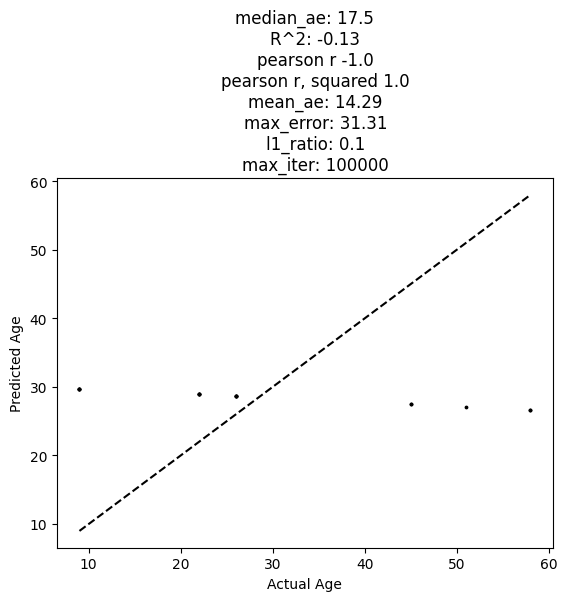

(array([27.5   , 27.5   , 29.75  , 29.75  , 29.75  , 29.75  , 26.6875,
        26.6875, 27.125 , 28.9375, 28.9375, 28.9375, 28.9375, 28.6875,
        28.6875, 28.6875, 28.6875]),
 LeaveOneOut(),
 ElasticNetCV(cv=5, l1_ratio=0.1, max_iter=100000))

In [23]:
nested_cv_clock(X, y)